* データマイニング特別演習 演習テーマ３ - yolov8による物体検出(サンプルデータの学習) -

1. google colaboratory のノートブックを開き、ランタイムのハードウェアアクセラレータをGPUに変更
2. MS-COCO データのサブセットをダウンロードして展開
3. 作成済みの作業環境に移動し、ms-coco-subset-sudspg-dmt3.yaml をダウンロード
4. yolo v8 のモデルを利用し、MS-COCO データのサブセットを学習
5. サンプル画像で動作を確認


In [1]:
# 2. MS-COCO データのサブセットをダウンロードして展開 (yolov8_09_mscoco.ipynb で作成)
from google.colab import drive
drive.mount('/content/drive')
%cd /content

! wget https://park.saitama-u.ac.jp/~khiramatsu/sudspg/ms-coco-subset-sudspg-dmt3.tar.gz
! tar xfvz ms-coco-subset-sudspg-dmt3.tar.gz

#import locale
#locale.getpreferredencoding = lambda: "UTF-8"
#!tar xfvz /content/drive/MyDrive/sudspg/ms-coco-subset-sudspg-dmt3.tar.gz

Mounted at /content/drive
/content
--2023-06-30 01:15:48--  https://park.saitama-u.ac.jp/~khiramatsu/sudspg/ms-coco-subset-sudspg-dmt3.tar.gz
Resolving park.saitama-u.ac.jp (park.saitama-u.ac.jp)... 153.120.167.247
Connecting to park.saitama-u.ac.jp (park.saitama-u.ac.jp)|153.120.167.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 161493226 (154M) [application/x-gzip]
Saving to: ‘ms-coco-subset-sudspg-dmt3.tar.gz’

ms-coco-subset-suds 100%[===================>] 154.01M  10.2MB/s    in 16s     

2023-06-30 01:16:04 (9.76 MB/s) - ‘ms-coco-subset-sudspg-dmt3.tar.gz’ saved [161493226/161493226]

datasets/
datasets/ms-coco-subset/
datasets/ms-coco-subset/images/
datasets/ms-coco-subset/images/train/
datasets/ms-coco-subset/images/train/000000006614.jpg
datasets/ms-coco-subset/images/train/000000076547.jpg
datasets/ms-coco-subset/images/train/000000060449.jpg
datasets/ms-coco-subset/images/train/000000034257.jpg
datasets/ms-coco-subset/images/train/000000008211.

In [2]:
# 3. 作成済みの作業環境に移動し、ms-coco-subset-20230628.yaml をダウンロード
%cd /content/drive/MyDrive/sudspg/ultralytics
!wget -O ms-coco-subset-sudspg-dmt3.yaml https://park.saitama-u.ac.jp/~khiramatsu/sudspg/ms-coco-subset-sudspg-dmt3.yaml
!cat ms-coco-subset-sudspg-dmt3.yaml

/content/drive/MyDrive/sudspg/ultralytics
--2023-06-30 01:16:20--  https://park.saitama-u.ac.jp/~khiramatsu/sudspg/ms-coco-subset-sudspg-dmt3.yaml
Resolving park.saitama-u.ac.jp (park.saitama-u.ac.jp)... 153.120.167.247
Connecting to park.saitama-u.ac.jp (park.saitama-u.ac.jp)|153.120.167.247|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 271
Saving to: ‘ms-coco-subset-sudspg-dmt3.yaml’

ms-coco-subset-suds 100%[===================>]     271  --.-KB/s    in 0s      

2023-06-30 01:16:21 (15.8 MB/s) - ‘ms-coco-subset-sudspg-dmt3.yaml’ saved [271/271]

# Path
path: /content/datasets/ms-coco-subset  # dataset root dir
train: images/train  # train images (relative to 'path') 
val: images/val  # val images (relative to 'path') 

# Classes
nc: 3  # number of classes
names: ['person', 'car', 'chair']  # class names


In [4]:
# 4. yolo v8 のモデルを利用し、MS-COCO データのサブセットを学習
from ultralytics import YOLO
model = YOLO("yolov8s.pt")
_name = "ms-coco-subset-sudspg-dmt3-yolov8s"
result = model.train(data="ms-coco-subset-sudspg-dmt3.yaml",
                     name=_name,
                     epochs=200,
                     batch=8,
                     workers=4,
                     degrees=90.0,
                     exist_ok=True,
                     pretrained=False,
                     amp=False)

100%|██████████| 21.5M/21.5M [00:01<00:00, 16.5MB/s]
New https://pypi.org/project/ultralytics/8.0.124 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.123 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=ms-coco-subset-sudspg-dmt3.yaml, epochs=200, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=ms-coco-subset-sudspg-dmt3-yolov8s, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=False, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_str

In [5]:
# 5. 作成したモデルをテスト
import glob

model = YOLO('/content/drive/MyDrive/sudspg/ultralytics/runs/detect/ms-coco-subset-sudspg-dmt3-yolov8s/weights/best.pt')
_project = '/content/drive/MyDrive/sudspg/ultralytics/runs/detect'
_name = "predict-ms-coco-subset-sudspg-dmt3-yolov8s"
_sources = glob.glob('/content/datasets/ms-coco-subset/images/test')
for _source in _sources:
  result = model.predict(source=_source,
                        project=_project,
                        name=_name,
                        exist_ok=True,
                        save=True,
                        save_txt=True, conf=0.2, iou=0.5)

# _sources = '/content/datasets/ms-coco-subset/images/test'
# model(source=_sources, project=_project, name=_name, exist_ok=True,
#       save=True, save_txt=True, conf=0.2, iou=0.5)


image 1/200 /content/datasets/ms-coco-subset/images/test/000000093437.jpg: 384x640 (no detections), 73.2ms
image 2/200 /content/datasets/ms-coco-subset/images/test/000000093717.jpg: 448x640 3 persons, 67.6ms
image 3/200 /content/datasets/ms-coco-subset/images/test/000000093965.jpg: 480x640 (no detections), 70.4ms
image 4/200 /content/datasets/ms-coco-subset/images/test/000000094157.jpg: 640x384 (no detections), 68.2ms
image 5/200 /content/datasets/ms-coco-subset/images/test/000000094185.jpg: 480x640 (no detections), 13.6ms
image 6/200 /content/datasets/ms-coco-subset/images/test/000000094326.jpg: 640x480 (no detections), 63.3ms
image 7/200 /content/datasets/ms-coco-subset/images/test/000000094336.jpg: 448x640 (no detections), 13.2ms
image 8/200 /content/datasets/ms-coco-subset/images/test/000000094614.jpg: 448x640 (no detections), 12.6ms
image 9/200 /content/datasets/ms-coco-subset/images/test/000000094751.jpg: 640x480 (no detections), 12.5ms
image 10/200 /content/datasets/ms-coco-sub

103


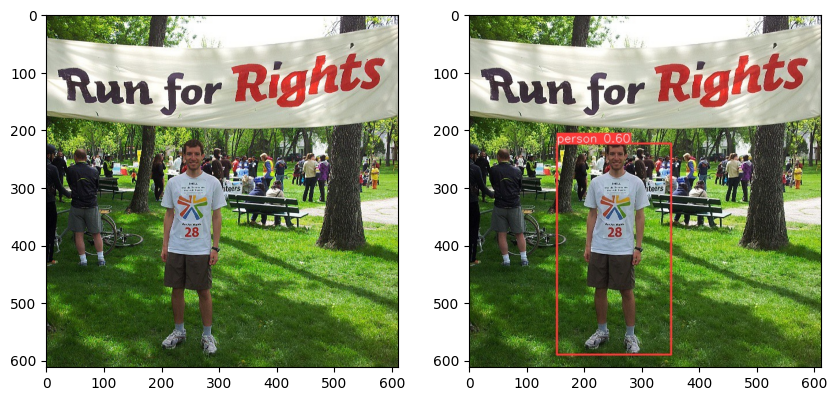

In [13]:
# 5. 検出結果を表示
import os
import matplotlib.pyplot as plt
import cv2
import random

_sources = glob.glob('/content/datasets/ms-coco-subset/images/test/*.jpg')
_i = random.randint(0, len(_sources)-1)
print(_i)
_basename = os.path.basename(_sources[_i])
_result_dir = '/content/drive/MyDrive/sudspg/ultralytics/runs/detect/predict-ms-coco-subset-sudspg-dmt3-yolov8s'
_result_img = os.path.join(_result_dir, _basename)
if os.path.exists(_result_img):
  original_img = cv2.cvtColor(cv2.imread(_sources[_i]), cv2.COLOR_BGR2RGB)
  result_img = cv2.cvtColor(cv2.imread(_result_img), cv2.COLOR_BGR2RGB)
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  plt.imshow(original_img)
  plt.subplot(1, 2, 2)
  plt.imshow(result_img)